In [3]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"guanidine","key":"cac812b229a97b415c2b175eb023190f"}'}

In [5]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download -d rmisra/news-category-dataset

 64% 17.0M/26.5M [00:00<00:00, 53.5MB/s]
100% 26.5M/26.5M [00:00<00:00, 77.3MB/s]


In [8]:
!unzip news-category-dataset

Archive:  news-category-dataset.zip
  inflating: News_Category_Dataset_v3.json  


Import all the required Libraries:

In [9]:
import os
import re
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import nltk
import string
from nltk.corpus import stopwords

The data is present in the form of json. We would convert this into a dataframe using pandas library

In [10]:
import json
import pandas as pd
with open('News_Category_Dataset_v3.json', 'r') as f:
  json_data = f.read()
json_data2 = [json.loads(line) for line in json_data.split('\n') if line]
df = pd.DataFrame.from_records(json_data2)

Let’s see the columns present in our dataset

In [11]:
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


 Now we would use the top 10 categories to train our model

In [12]:
top_10_categories = df['category'].value_counts().nlargest(10).index
print("Top 10 categories:", top_10_categories)
# Filtering data for top 10 categories
data = df[['category', 'short_description']][df['category'].isin(
top_10_categories)].reset_index(drop=True)
display(data['category'].value_counts())

Top 10 categories: Index(['POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'TRAVEL', 'STYLE & BEAUTY',
       'PARENTING', 'HEALTHY LIVING', 'QUEER VOICES', 'FOOD & DRINK',
       'BUSINESS'],
      dtype='object', name='category')


category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
Name: count, dtype: int64

Now let’s visualize the data in form of pie chart:

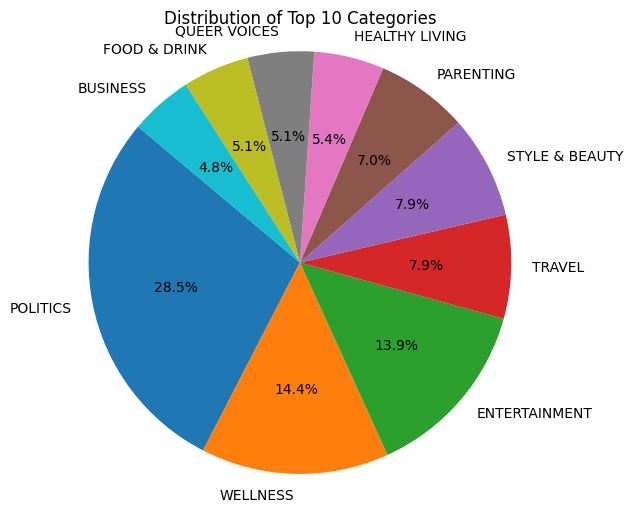

In [13]:
import matplotlib.pyplot as plt
# Counting occurrences of each category
category_counts = data['category'].value_counts()
# Creating a pie chart
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index,
autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 10 Categories')
plt.axis('equal')
plt.show()

Now we will pre-process our dataset to remove any unwanted text or strings from the dataset

In [21]:
from sklearn.model_selection import train_test_split as tts
Xtrain,Ytest=tts(data,random_state=1,test_size=0.2)

In [19]:
Xtrain

,short_description,clean_text,clean_text_without_stopwords,stemmed_text,preprocessed_text
17458,"Each week, LGBT HealthLink, a program of Cente...",each week lgbt healthlink a program of centerl...,week lgbt healthlink program centerlink and re...,each week lgbt healthlink a program of centerl...,week lgbt healthlink program centerlink and re...
96993,"What do we do after we've diapered, fed, swadd...",what do we do after weve diapered fed swaddled...,weve diapered fed swaddled cuddled rocked sung...,what do we do after weve diaper fed swaddl cud...,weve diaper fed swaddl cuddl rock sung deswadd...
57033,,,,,
4907,The president's son-in-law had been using a te...,the presidents soninlaw had been using a tempo...,presidents soninlaw using temporary security c...,the presid soninlaw had been use a temporari s...,presid soninlaw use temporari secur clearanc f...
26031,,,,,
...,...,...,...,...,...
50057,Obama's push for transgender rights reaches th...,obamas push for transgender rights reaches the...,obamas push transgender rights reaches health ...,obama push for transgend right reach the healt...,obama push transgend right reach health care s...
98047,We've decided to focus on getting healthy this...,weve decided to focus on getting healthy this ...,weve decided focus getting healthy month eatin...,weve decid to focus on get healthi this month ...,weve decid focus get healthi month eat delici ...
5192,"The singer said she ""lost my sanity"" after the...",the singer said she lost my sanity after the s...,singer said lost sanity success single whip hair,the singer said she lost my saniti after the s...,singer said lost saniti success singl whip hair
77708,There are few couples who elicit as much jealo...,there are few couples who elicit as much jealo...,couples elicit much jealousy chrissy teigen jo...,there are few coupl who elicit as much jealous...,coupl elicit much jealousi chrissi teigen john...


In [14]:
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


nltk.download('wordnet')
nltk.download('stopwords')

def preprocess_text(text):
    '''Preprocess text by making it lowercase, removing text in square brackets,removing links, removing punctuation, and removing words containing numbers.'''
    return re.sub('\[.*?\]|\w*\d\w*|https?://\S+|www\.\S+|<.*?>+|[%s]' % re.escape(string.punctuation), '', str(text).lower())

def eliminate_stopwords(text):
    '''Remove stopwords from the text'''
    stop_words = stopwords.words('english')
    words = text.split(' ')
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

def apply_stemming(sentence):
    stemmer = nltk.SnowballStemmer("english")
    return ' '.join(stemmer.stem(word) for word in sentence.split(' '))

def preprocess_and_clean(sentence):
    '''Preprocess and clean the text'''
    cleaned_text = preprocess_text(sentence)
    stop_words = stopwords.words('english')
    removed_stopwords_text = ' '.join(word for word in cleaned_text.split(' ') if word not in stop_words)
    stemmed_text = ' '.join(apply_stemming(word) for word in removed_stopwords_text.split(' '))
    return stemmed_text

data['clean_text'] = data['short_description'].apply(preprocess_text)
data['clean_text_without_stopwords'] = data['clean_text'].apply(eliminate_stopwords)
data['stemmed_text'] = data['clean_text'].apply(apply_stemming)
data['preprocessed_text'] = data['clean_text'].apply(preprocess_and_clean)



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = TfidfVectorizer()
# fit_transform for train data
tfid_X_train = vectorizer.fit_transform(Xtrain['clean_text'])
tfid_y_train = Xtrain['category']
# transform for test data
tfid_X_test = vectorizer.transform(Ytest['clean_text'])
tfid_y_test = Ytest['category']

For model training and prediction we will be using Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
X_train, X_val, Y_train, Y_val = train_test_split(tfid_X_train, tfid_y_train, test_size=0.25, random_state=42)
model = LogisticRegression(random_state=42)
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train, Y_train)

For evaluating the model we can use metrics such as accuracy, precision, recall

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_pred = rfc.predict(X_val)
acc = accuracy_score(Y_val, y_pred)
print(f'Accuracy: {acc}')
precision = precision_score(Y_val, y_pred, average='weighted')
print(f'Precision: {precision}')
# Calculate recall
recall = recall_score(Y_val, y_pred, average='weighted')
print(f'Recall: {recall}')

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_pred = model.predict(X_val)
acc = accuracy_score(Y_val, y_pred)
print(f'Accuracy: {acc}')
precision = precision_score(Y_val, y_pred, average='weighted')
print(f'Precision: {precision}')
# Calculate recall
recall = recall_score(Y_val, y_pred, average='weighted')
print(f'Recall: {recall}')

Accuracy: 0.6421588268290729
Precision: 0.6382976473460158
Recall: 0.6421588268290729
